# RNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing training dataset

In [6]:
train_dataset = pd.read_csv('/Users/juggs/Desktop/Python/projects/stock (LSTM Recurrent Neural Network)/google-stock-price/Google_Stock_Price_Train.csv')
training_set = train_dataset.iloc[:,1:2].values

Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_dataset_scaled = sc.fit_transform(training_set)

Creating a dat structure with 60 timesteps and 1 output

In [10]:
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(train_dataset_scaled[i-60:i,0])
    y_train.append(train_dataset_scaled[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)    

Reshaping

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Building the RNN

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Initialising the RNN

In [14]:
regressor = Sequential()

Adding first LSTM layer and Droput regularisation

In [15]:
regressor.add(LSTM(units = 50,return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

Adding second LSTM layer and Droput regularisation

In [16]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

Adding third LSTM layer and Droput regularisation

In [17]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

Adding fourth LSTM layer and Droput regularisation

In [18]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Adding output layer

In [19]:
regressor.add(Dense(units = 1))

Compiling the RNN

In [20]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Fitting thr RNN to training set

In [21]:
regressor.fit(x_train,y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0423
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0056
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0013


Making the predictions and visualising the results

In [22]:
test_dataset =  pd.read_csv('/Users/juggs/Desktop/Python/projects/stock (LSTM Recurrent Neural Network)/google-stock-price/Google_Stock_Price_Test.csv')
real_stock_price = test_dataset.iloc[:,1:2].values

Getting predicted stock price of 2017

In [26]:
dataset_total = pd.concat((train_dataset['Open'],test_dataset['Open']),axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_dataset) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)    
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualising the results

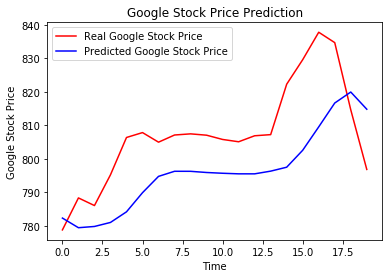

In [27]:
plt.plot(real_stock_price, color = 'r', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'b', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()